In [67]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpld3

In [68]:
import glob
data_dir = "../data/duty-bif/"

In [69]:
files = glob.glob(data_dir + '*.npy')

In [70]:
peak_list = {}

for f in files:
    duty = float(f.split('-')[-1].split('.npy')[0])
    l = np.load(f)
    peak_list[duty] = l

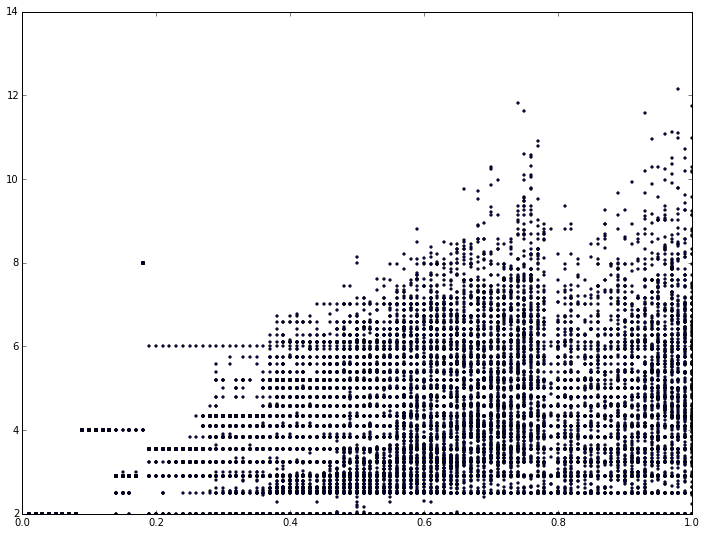

In [71]:
plt.figure(figsize=(12, 9))
plt.xlim(0., 1.)
for duty in peak_list:
    pks = peak_list[duty]
    plt.scatter([duty for i in range(len(pks))], pks, marker='.')
plt.ylim(2)
plt.show()

In [44]:
files = glob.glob(data_dir + '*.tcp')
files_list = {}
for f in files:
    duty = float(f.split('-')[-1].split('.tcp')[0])
    files_list[duty] = f
#for duty_val in sorted(duty_files_list):
#    print files_list[duty_val]
print sorted(files_list)

ValueError: invalid literal for float(): 0.010000.npy

In [40]:
def extract_cwnd(filename, N):
    data = np.loadtxt( filename, usecols=(1,3,7,17) ) #(time, src, dst, cwnd)
    cwnd = [[np.empty((0,2)) for i in range(N)] for j in range(N)]
    for d in data:
        src = int(d[1])
        dst = int(d[2])
        if src == dst or not(0<=src<N) or not(0<=dst<N):
            continue
        cwnd[src][dst] = np.vstack((cwnd[src][dst], (d[0], d[3])))
    return cwnd

def plot_all_cwnd(cwnd_data):
    N = len(cwnd_data)
    for src in range(N):
        plt.figure(figsize=(15, 2))
        for dst in range(N):
            if src == dst:
                continue
            target = cwnd_data[src][dst]
            plt.plot(target[:,0], target[:,1], label=("node[%d] -> node[%d]"%(src, dst)))
        plt.ylim(1,40)
        #plt.legend()
        plt.show()

In [41]:
#cwnd = extract_cwnd(files_list[0.7], 10)
#plot_all_cwnd(cwnd)

In [42]:
from os import path

peak_list = {}
load = True

for duty in files_list:
    filename = data_dir + ("peaks_duty-%f.npy" % duty)
    if load and path.exists(filename):
        print str(duty) + " : load"
        l = np.load(filename)
    else:
        print str(duty) + " : calculate"
        cwnd = extract_cwnd(files_list[duty], 10) 
        target_cwnd = cwnd[3][7][:,1]
        local_max = np.r_[True, target_cwnd[1:] > target_cwnd[:-1]] & np.r_[target_cwnd[:-1] > target_cwnd[1:], True]
        l = [ c for c, b in zip(target_cwnd, local_max) if b]
        np.save(filename, l)
    peak_list[duty] = l

0.25 : load
0.15 : load
0.05 : load


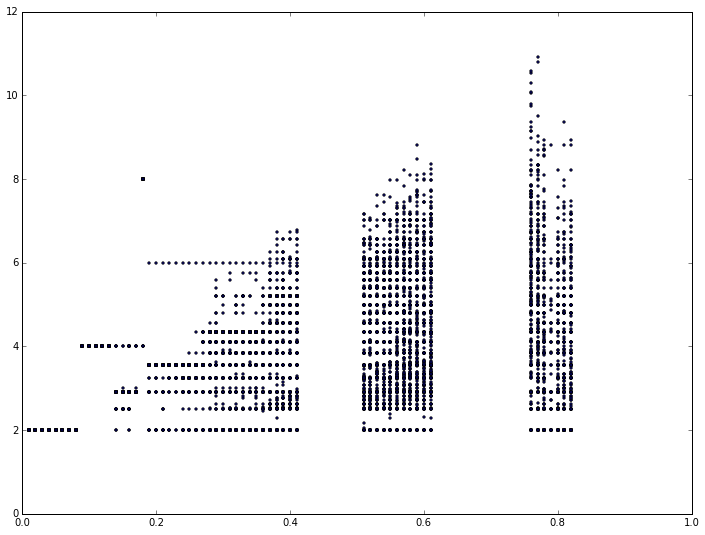

In [48]:
plt.figure(figsize=(12, 9))
plt.xlim(0., 1.)
for duty in peak_list:
    pks = peak_list[duty]
    plt.scatter([duty for i in range(len(pks))], pks, marker='.')

In [32]:
for p in peak_list.values():
    print p
#plt.show()

[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.]
[ 6.     2.     3.834  2.     3.553  3.553  3.553  3.553  3.553  3.553
  3.553  3.553  3.553  3.553  2.9    2.     3.553  3.553  3.553  2.9    3.553
  2.5    2.     3.553  3.553  3.553  2